# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, exposure, feature, filters, io, transform 

## Template Matching

**Students' note**: For all future considerations about template matching and cross-correlation invariance, it should be clear that the main target is the LEFT EYE given that, even being both eyes quite similar, there is a rotational difference between them. This means that the right eye is not an ideal template for the left eye, and vice-versa.

This is why we are considering that the template matching is working when the left eye is detected,

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

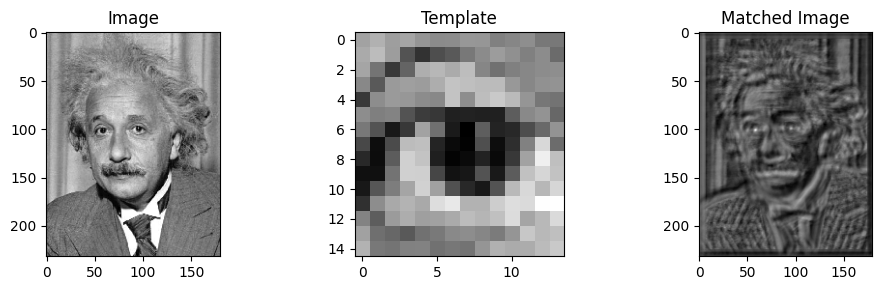

In [4]:
# solution

image = io.imread('images/einstein.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

match_temp = feature.match_template(image, template, pad_input=True)

fig, ax = plt.subplots(1, 3, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')
ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

fig.tight_layout();

*   What is the output of the normalized cross-correlation function?

**Solution**

The output of the cross-correlated image is a matrix of size (M-m+1, N-n+1) where M and N are the dimensions of the original image and m and n are the dimensions of the template image. Crosscorrelation values are all of them between -1 and 1, being 1 a perfect correlation with the template image.

In this case, we can see that the eyes show a high correlation with the template image, which is expected. This is represented as a white spot in the cross-correlated image.

It was necessary to add some padding to the template image to make it fit the original image.

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

Text(0.5, 1.0, 'Thresholded Matched Image')

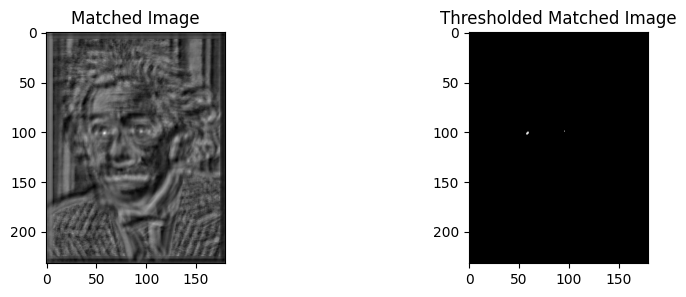

In [5]:
# solution

def thresh_match(match_temp, thresh):
    match_temp_thresh = match_temp.copy()
    match_temp_thresh = (match_temp_thresh - match_temp_thresh.min()) / (match_temp_thresh.max() - match_temp_thresh.min())
    match_temp_thresh[match_temp_thresh < thresh] = 0
    return match_temp_thresh

match_temp_thresh = thresh_match(match_temp, 0.67)

fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].imshow(match_temp, cmap='gray')
ax[0].set_title('Matched Image')
ax[1].imshow(match_temp_thresh, cmap='gray')
ax[1].set_title('Thresholded Matched Image')

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

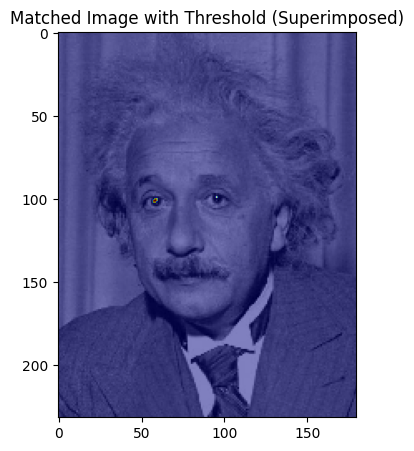

In [6]:
# solution
plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')
plt.imshow(match_temp_thresh, cmap='jet', alpha=0.5)
plt.title('Matched Image with Threshold (Superimposed)');

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

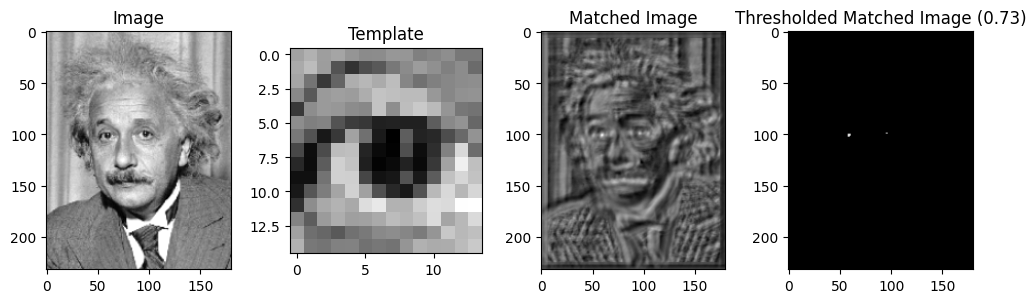

In [49]:
# solution

image = io.imread('images/einstein_br.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

thresh = 0.73
match_temp = feature.match_template(image, template, pad_input=True)

match_temp_thresh = thresh_match(match_temp, thresh)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title(f'Thresholded Matched Image ({thresh})')

fig.tight_layout();

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

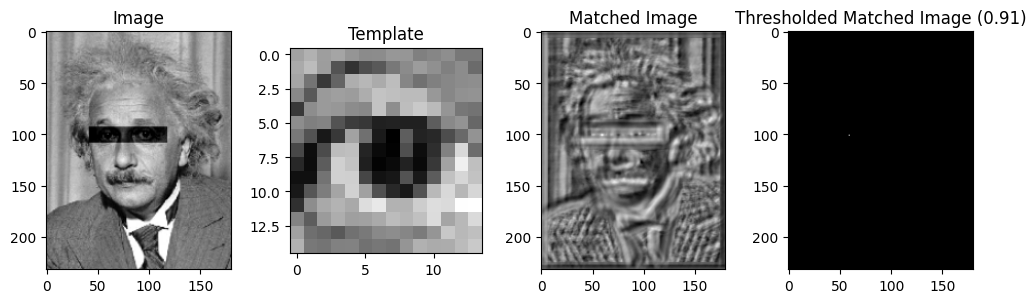

In [48]:
# solution

# solution

image = io.imread('images/einstein_mask.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

thresh = 0.91
match_temp = feature.match_template(image, template, pad_input=True)

match_temp_thresh = thresh_match(match_temp, thresh)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title(f'Thresholded Matched Image ({thresh})')

fig.tight_layout();

*   Do you find any differences in results with respect to contrast changes? 
*   Explain your inferences.

**Solution**

In the first image, the contrast is high, so the template matching works well. In the second image, the contrast is a bit lower, so the template matching does not work as well as in the first image. However, the left eye is still detected but with a lower threshold (0.73 ). The reason is that the correlation in this case is not much bigger than some other points in mouth and chin.

When the eyes are covered, the template matching performs worse but the left eye is still detected. This is because even when the template image is still in the original one, the changes in intensity make the correlation coefficients to be lower and it is impossible to find a threshols which takes exclusively the two eyes. There is a problem with the right one. In this case, the minimum threshold to capture only eyes (without false positives) is 0.91 instead of 0.73.

While Normalized Cross Correlation is less sensitive to overall intensity changes, it can still struggle with local illumination changes. If the lighting conditions in the image vary significantly across the region you're trying to match, Normalized Cross Correlation might not be sufficient.

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

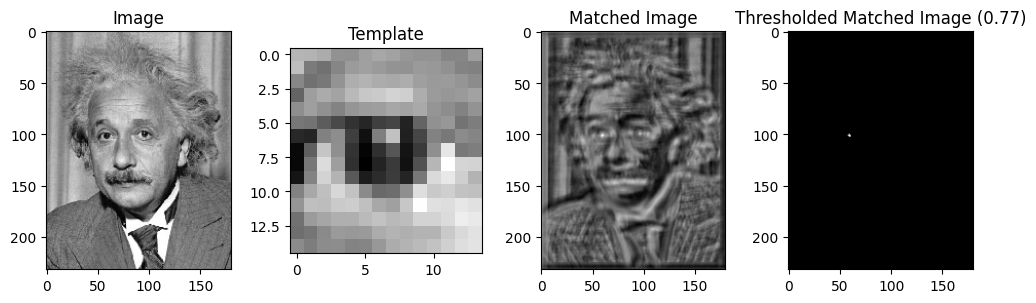

In [53]:
# solution

image = io.imread('images/einstein.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template_br.png')[:, :, :3]
template = color.rgb2gray(template)

thresh = 0.77
match_temp = feature.match_template(image, template, pad_input=True)

match_temp_thresh = thresh_match(match_temp, thresh)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title(f'Thresholded Matched Image ({thresh})')

fig.tight_layout();

**Solution**

*   What happens if you change the contrast of the template image?

If you change the contrast of the template image, the template matching does not work as well as in the first image. However, the left eyes is still detected. the correlation threshold is 0.77 now, higher than in the first case (0.73) and lower than with the mask (0.91).

It can be considered that the template matching using normalized crosscorrelation is acceptablily resilient to contrast changes.

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

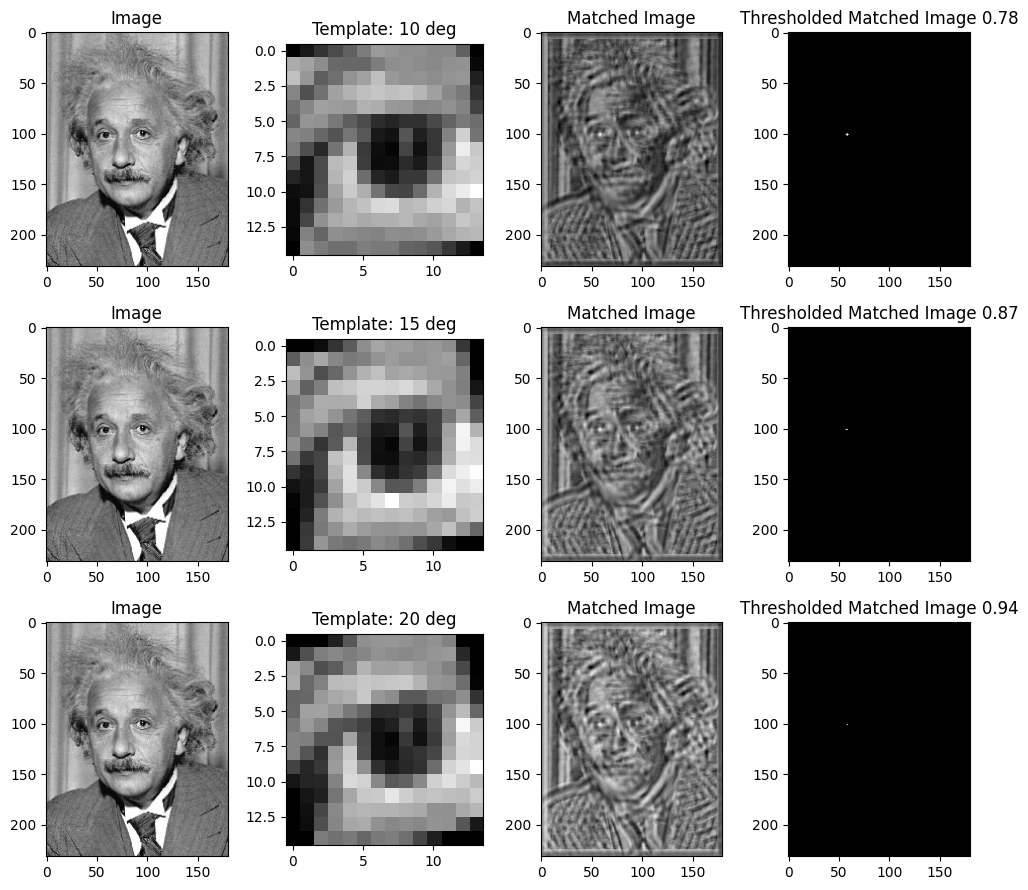

In [68]:
# solution

image = io.imread('images/einstein.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

ls_angles = [10, 15, 20]

n = len(ls_angles)
fig, ax = plt.subplots(n, 4, figsize=(10, 3 * n))

ls_thresholds = [.78, .87, .94]

i = 0
for angle, thresh in zip(ls_angles, ls_thresholds):
    template_rot = transform.rotate(template, angle)
    match_temp = feature.match_template(image, template_rot, pad_input=True)
    match_temp_thresh = thresh_match(match_temp, thresh)

    ax[i, 0].imshow(image, cmap='gray')
    ax[i, 0].set_title('Image')

    ax[i, 1].imshow(template_rot,  cmap='gray')
    ax[i, 1].set_title('Template: {} deg'.format(angle))

    ax[i, 2].imshow(match_temp, cmap='gray')
    ax[i, 2].set_title('Matched Image')

    ax[i, 3].imshow(match_temp_thresh, cmap='gray')
    ax[i, 3].set_title(f'Thresholded Matched Image {thresh}')

    i += 1

fig.tight_layout();

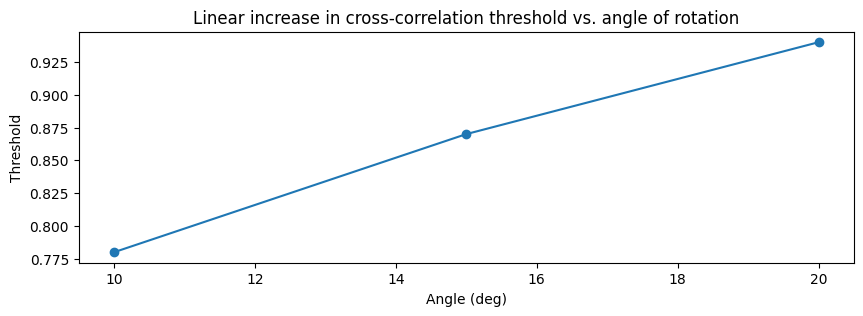

In [72]:
# Plot increase in threshold vs. angle

plt.figure(figsize=(10, 3))
plt.plot(ls_angles, ls_thresholds, 'o-')
plt.xlabel('Angle (deg)')
plt.ylabel('Threshold')
plt.title('Linear increase in cross-correlation threshold vs. angle of rotation');

Text(0.5, 0.98, 'Is it a 180 degree rotated left eye a right eye?')

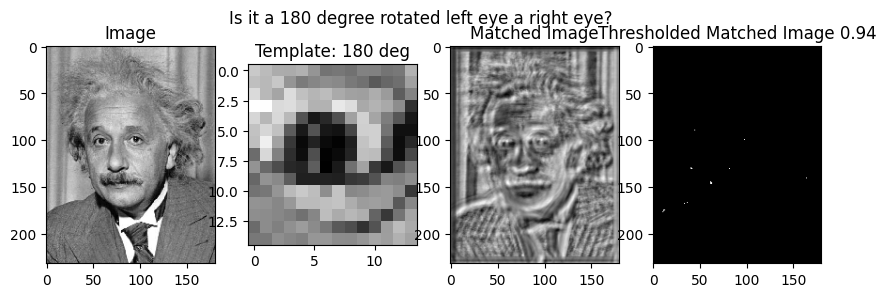

In [86]:
angle = 180
thresh = 0.94
template_rot = transform.rotate(template, angle)
match_temp = feature.match_template(image, template_rot, pad_input=True)
match_temp_thresh = thresh_match(match_temp, thresh)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template_rot,  cmap='gray')
ax[1].set_title('Template: {} deg'.format(angle))

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title(f'Thresholded Matched Image {thresh}')

plt.suptitle("Is it a 180 degree rotated left eye a right eye?")

*   What do you infer with respect to rotation?

**Solution**

Definitely the crosscorrelation method for template matching is not invariant to rotation. As it can be observed in the line plot above, the correlation coefficient decreases (increase of the necessary threshold) as the rotation angle increases. This is because the template image is not a perfect match for the original image. The best match is obtained when the rotation angle is 0.

In the image above, it was tried to check if Einstein's left eye is the right eye with a 180 degrees rotation. It's true that it is detected with a higher correlation coefficient than the other one, but it is not the best match given that other parts of the picture have higher correlation.

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


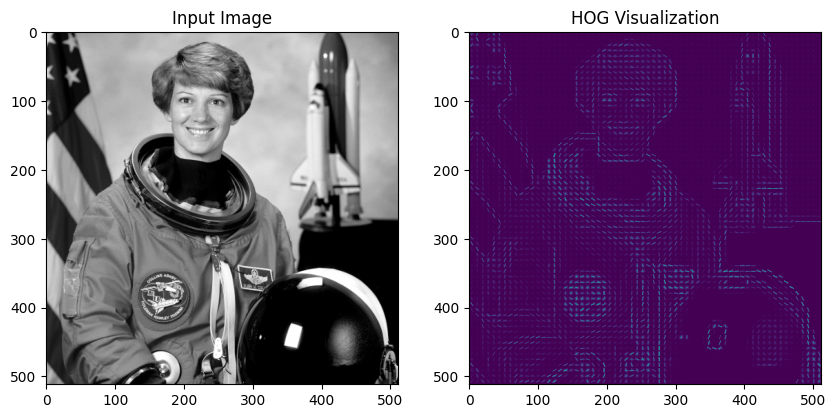

In [89]:
# solution

image = data.astronaut()
image = color.rgb2gray(image)
hog_vec, hog_vis = feature.hog(image, visualize=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(hog_vis)
plt.title('HOG Visualization');

*   Explain the algorithm behind HOG



**Solution**

HOG algorithm, as implemented in skimage.feature.hog, is based on the following steps:

1. (optional) global image normalisation: gamma compression ehich helps to reduce the effects of local shadowing and illumination variations.

2. computing the gradient image in x and y to capture contour, silhouette and some texture information, while providing further resistance to illumination variations.

3. computing gradient histograms: produce an encoding that is sensitive to local image content while remaining resistant to small changes in pose or appearance. The adopted method pools gradient orientation information locally in the same way as the SIFT feature. The image window is divided into small spatial regions, called “cells”. For each cell we accumulate a local 1-D histogram of gradient or edge orientations over all the pixels in the cell.

4. normalising across blocks: takes local groups of cells and contrast normalises their overall responses before passing to next stage. Normalisation introduces better invariance to illumination, shadowing, and edge contrast.

5. flattening into a feature vector: The final step collects the HOG descriptors from all blocks of a dense overlapping grid of blocks covering the detection window into a combined feature vector for use in the window classifier.

*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

It is not necessary. In some cases, HOG can work well with raw color and gamma values, and in other cases, pre-processing may be beneficial to improve the performance of your object detection or image classification tasks

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

* orientation: Number of orientation bins. If set to 8, the possible gradient bins will be \[0-45\), \[45-90\), \[90-135\), \[135-180\), \[180-225\), \[225-270\), \[270-315\) and \[315, 360\) in degrees.

* pixels_per_cell: specifies the dimensions of each cell in terms of pixel width and pixel height. For example, if you set "pixels per cell" to (8, 8), each cell will cover an 8x8 pixel region in the image.

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

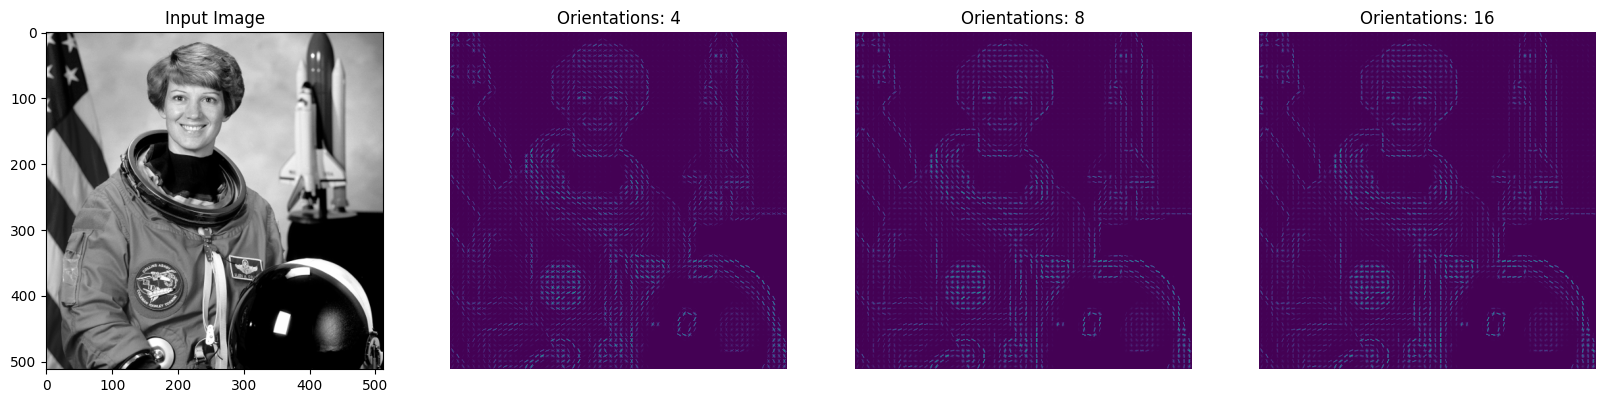

In [100]:
# solution

ls_orientations = [4, 8, 16]
n = len(ls_orientations)
fig, ax = plt.subplots(1, n+1, figsize=(20, 20))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')
for i, orient in enumerate(ls_orientations):
    hog_vec, hog_vis = feature.hog(image, visualize=True, orientations=orient)
    hog_vis = exposure.rescale_intensity(hog_vis, in_range=(0, 10))
    ax[i+1].imshow(hog_vis)
    ax[i+1].set_title('Orientations: {}'.format(orient))
    ax[i+1].axis('off')


Increasing the number of orientation bins will increase the accuracy of the feature vector, but also increase the time it takes to compute the HOG descriptor. The number of orientation bins should be selected based on the amount of rotation invariance required for your application.

*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**
The role of block normalization is to remove the effect of local light differences and proportion more invariance to contrast and scale in addition to reduce the noise effect. 

In skimage:
block_normstr {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
Block normalization method:

- L1: Normalization using L1-norm.

- L1-sqrt: Normalization using L1-norm, followed by square root.

- L2: Normalization using L2-norm.

- L2-Hys:Normalization using L2-norm, followed by limiting the maximum values to 0.2 (Hys stands for hysteresis) and renormalization using L2-norm. (default) 

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

In [109]:
hog_vec = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=False)
hog_vec.shape[0]

311364

- pixels per cell: (8, 8). This means e

In [105]:
image.shape

(512, 512)

**Solution**

*(Double-click or enter to edit)*

...

### Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

In [ ]:
# solution




*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot*


In [ ]:
# solution



*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

*(Double-click or enter to edit)*

...

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   What is the difference between using dot product and euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of L2_1: Template Matching and HOG**
Deadline for L2_1 submission in CampusVirtual is: **6th of November, 2023**
